<a id="table-of-contents"></a>

<div style="background:#2b6684   ;font-family:'Times';font-size:35px;color:  #F0CB8E" >&ensp;Table of Contents</div>
<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px" >
    
<li><a href = "#1"> 1. Introduction </a></li>     
<li ><a href = "#2"> 2. Preparations </a></li> 
<ul>
<li ><a  href = "#200"> 2.1 Load Libraries </a></li>
<li ><a  href = "#201"> 2.2 Load Data </a></li>
</ul>
<li><a href = "#3"> 3. Overview: structure and data content</a></li>
<ul> 
<li  ><a href = "#300">3.1 Look at the data</a></li>
<li  ><a href = "#301">3.2 Missing Values Analysis</a></li>
</ul>  
<li ><a  href = "#4"> 4. Visualisation - Individual features </a></li>
<ul> 
<li  ><a href = "#400">4.1 Predictor features</a></li>
<li  ><a href = "#401">4.2 Target: Song Popularity</a></li>
</ul>  

<li ><a  href = "#5"> 5. Feature interactions</a></li>
<ul>
<li ><a  href = "#500"> 5.1 Target impact</a></li>
<li ><a  href = "#501"> 5.2 Feature-Feature interaction (correlation)</a></li>
<li ><a  href = "#502"> 5.3 Feature-target interactions</a></li>
    </ul></ul>
</div>


[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="1"></a>

<div style="background:#2b6684   ;font-family:'Times';font-size:35px;color:  #F0CB8E" >&ensp;Introduction</div>
<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404" >
<li>Welcome to one of the first Kaggle Community Competitions in the world!</li>
<li>This challenge is about predicting Song Popularity based on a set of different features.</li>
<li>This specific competition is about predicting Song Popularity based on a set of different features. It is positioned as the first in a series of starter competitions that provide a gentle introduction to machine learning (ML) and data science (DS). This is a classification challenge, with the evaluation metric being chosen as <a style="color:  blue" href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic" target="_blank"><u>AUC</u></a></li>
<li>The data consists of the standard Kaggle train.csv and test.csv files, with a sample_submission.csv to show you the structure of the file that should be submitted.</li>
<li>Checkout more about Data: <a style="color:  blue" href="https://www.kaggle.com/c/song-popularity-prediction/discussion/301616" target="_blank"> <u>Data Dictionary</u></a> by <a style="color:  blue" href="https://www.kaggle.com/remekkinas" target="_blank"> <u>Remek Kinas</u></a></li>   
   
<li>This notebook started out as a live-coding session on Abhishek Thakur’s channel on Youtube:<a style="color:  blue" href="https://www.youtube.com/watch?v=JXF-7rCcR1c" target="_blank"> <u>Link to the Youtube Video</u></a> </li>

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="2"></a>
<a id="2.1"></a>
<a id="2.2"></a>

<div style="background:#2b6684   ;font-family:'Times';font-size:35px;color:  #F0CB8E" >&ensp;Preparations</div>
<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404" >
<li><a href = "#200">Load Libraries</a></li>
    We load a range of libraries for general data wrangling and general visualisation together with more specialised tools.
<li><a href = "#201">Load Data</a></li>
    Import required dataset(s) (using pandas here) for the task in hand. 
</ul>
</div>


[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="200"></a>
<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:25px; font-weight:bold; color:#0E198A">Loading Libraries
</ul>

In [1]:
"""Loading Libraries"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="201"></a>
<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:25px; font-weight:bold; color:#0E198A">Loading Data
</ul>

In [2]:
"""Loading Data"""
train = pd.read_csv('../input/song-popularity-prediction/train.csv')
test = pd.read_csv('../input/song-popularity-prediction/test.csv')

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="3"></a>
<a id="3.1"></a>
<a id="3.2"></a>

<div style="background:#2b6684   ;font-family:'Times';font-size:35px;color:  #F0CB8E" >&ensp;Overview: structure and data content</div>
<div class="alert alert-warning" role="alert">
<li style="font-family:cursive;font-size:18px; color:#A20404">The first thing you want to do is to look at your actual data in its raw form. This will tell you about the types of features you’re dealing with (numeric, categorical, string, etc.), as well as already reveal some characteristics of the dataset. This includes checking for missing values.</li>

<li style="font-family:cursive;font-size:18px; color:#A20404">Generally, we don’t want to look at the test data any more than strictly necessary. The test dataset is intended to serve as our final model validation, and should only include data that the model has never seen before. Since our brain is part of the modelling process as well (or at least it should be), we want to avoid picking up any signal in the test data that could consciously or unconsciously influence our decisions. Thus, this EDA will almost entirely focus on the train.csv data.</li>
<ul style="font-family:cursive;font-size:18px; color:#A20404" >
    
<li><a href = "#300">Look at the data</a></li>
    We start by examining the data through the <b>.head() and .info() method</b>. They will display first 5 rows and allows us to see the data types involved, information about missing data and the shape of the data respectively.
<li><a href = "#301">Missing values</a></li>
    Let’s have a closer look at those missing values. How many are there in total in the train and test datasets? 
</ul>
</div>

[<p style="font-family:cursive;font-size:15px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="300"></a>
<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:25px; font-weight:bold; color:#0E198A">Look at the data
</ul>

In [3]:
"""Display top 5 rows of train data"""
display(train.head().style.set_table_attributes("style='display:inline'").set_caption('First Five rows of Training Data'))

"""Display Information about the train data"""
print('\n Information about Data')
display(train.info())



 Information about Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


None

[<p style="font-family:cursive;font-size:15px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="301"></a>
<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:25px; font-weight:bold; color:#0E198A">Missing Values
</ul>

In [4]:
"""Missing Values"""
print(f"The train set has {train.isnull().sum().sum()} missing values, and the test set has {test.isnull().sum().sum()}.")

The train set has 32187 missing values, and the test set has 7962.


<Figure size 1296x1152 with 0 Axes>

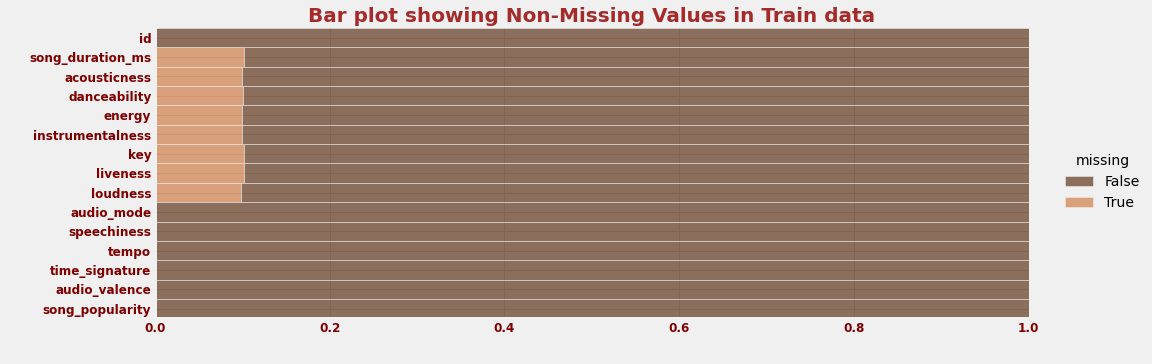

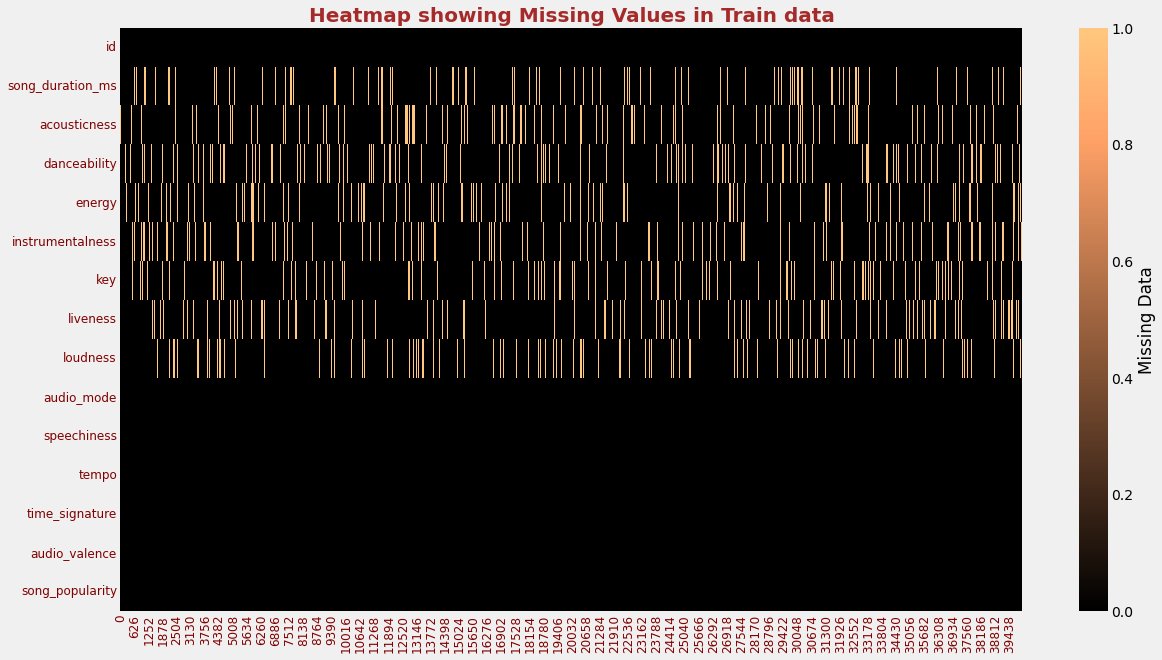

In [5]:
# Refrence (edited): https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
plt.figure(figsize=(18,16))
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='copper' 
)
plt.title('Bar plot showing Non-Missing Values in Train data', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');

plt.figure(figsize=(18,10))
sns.heatmap(train.isna().transpose(),
            cmap="copper",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values in Train data', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, color = 'maroon')
plt.yticks(size = 12, color = 'maroon')
plt.show();

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404">Observations: 
<li>Variable song_duration_ms has highest number of missing values.</li>
<li>Only 8 columns have missing values. </li>
</ul>
</div>

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="asdf"></a>

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px; color:#0E198A">Why are the missing values there? Example causes of missing data:</b>
<li>Sensor data where the sensor went offline.</li>
<li>Survey data where some questions were not answered.</li>
<li>A Kaggle competition where the host wants to make the problem hard :D</li>
<li>We need to understand Why you have missing values before deciding on the approach for dealing with them.</li>
</ul>
</div>

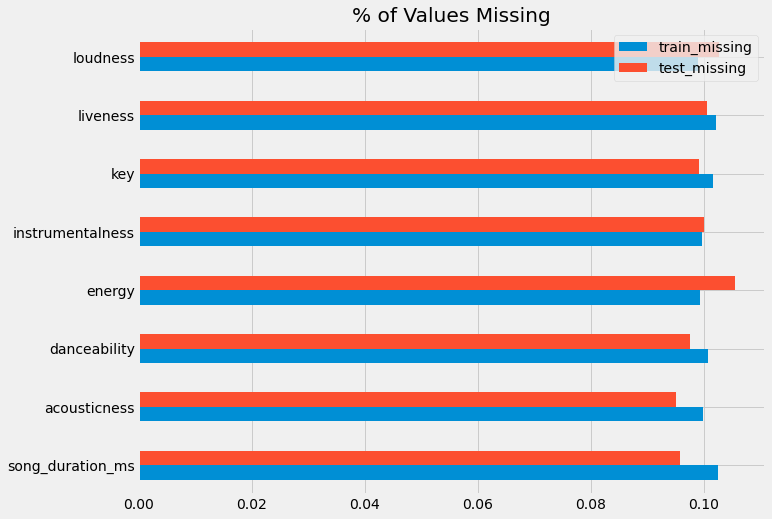

In [6]:
"""What are the counts of missing values in train vs. test?"""
ncounts = pd.DataFrame([train.isna().mean(), test.isna().mean()]).T
ncounts = ncounts.rename(columns={0: "train_missing", 1: "test_missing"})

ncounts.query("train_missing > 0").plot(
    kind="barh", figsize=(10, 8), title="% of Values Missing"
)
plt.show()

In [7]:
nacols = [
    "song_duration_ms",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "key",
    "liveness",
    "loudness",
]

<AxesSubplot:title={'center':'Number of Missing Values per Sample'}>

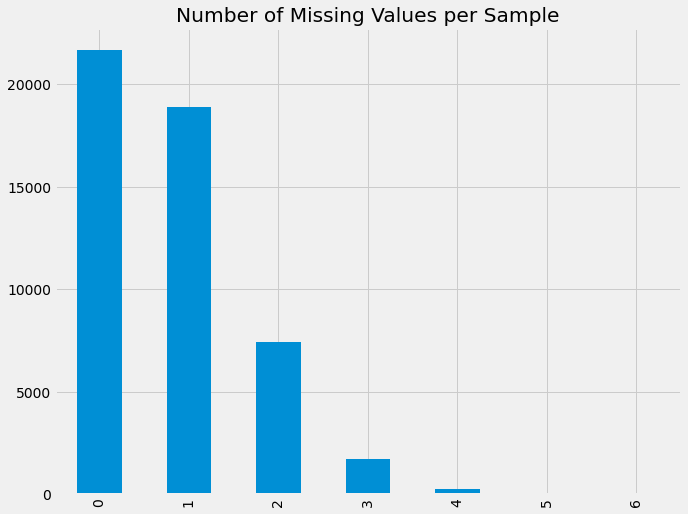

In [8]:
"""How many missing values per observation?"""

train["isTrain"] = True
test["isTrain"] = False

tt = pd.concat([train, test]).reset_index(drop=True).copy()

tt["n_missing"] = tt[nacols].isna().sum(axis=1)
train["n_missing"] = train[nacols].isna().sum(axis=1)
test["n_missing"] = test[nacols].isna().sum(axis=1)

tt["n_missing"].value_counts().plot(
    kind="bar", title="Number of Missing Values per Sample", figsize=(10, 8)
)

In [9]:
tt.query("n_missing == 6")

id  song_duration_ms  acousticness  danceability    energy  \
13457  13457          176401.0           NaN           NaN  0.833408   
19697  19697               NaN           NaN           NaN       NaN   
48594   8594               NaN           NaN           NaN  0.344299   

       instrumentalness  key  liveness   loudness  audio_mode  speechiness  \
13457               NaN  NaN       NaN        NaN           0     0.052580   
19697          0.003014  NaN       NaN -10.708472           0     0.035591   
48594               NaN  2.0       NaN        NaN           1     0.035495   

            tempo  time_signature  audio_valence  song_popularity  isTrain  \
13457  142.802779               3       0.546615              0.0     True   
19697   95.181833               3       0.483101              0.0     True   
48594  151.125383               4       0.463903              NaN    False   

       n_missing  
13457          6  
19697          6  
48594          6

In [10]:
"""Do we see an imbalance in missing values when splitting by other features?"""
cat_features = ["key", "audio_mode"]
tt.groupby("audio_mode")["n_missing"].mean()

audio_mode
0    0.804547
1    0.799677
Name: n_missing, dtype: float64

In [11]:
tt.groupby("time_signature")["n_missing"].agg(['mean','count'])

mean  count
time_signature                 
2               0.786337    688
3               0.805649  29174
4               0.800352  19895
5               0.744856    243

In [12]:
train.groupby("song_popularity")["n_missing"].mean()

song_popularity
0    0.807505
1    0.799739
Name: n_missing, dtype: float64

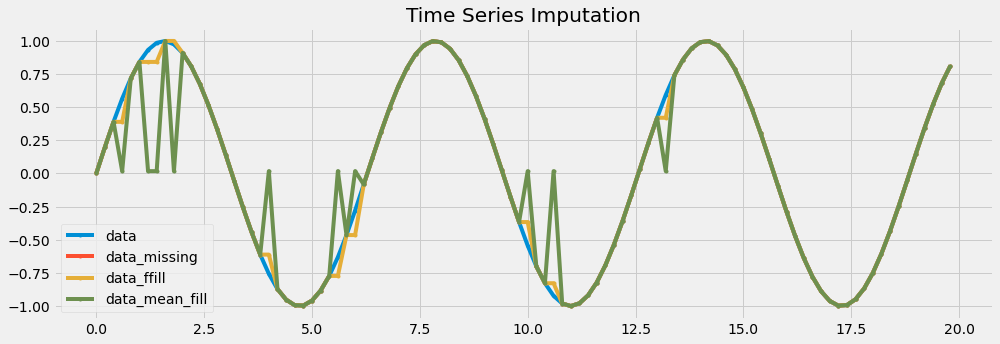

In [13]:
ts_data = pd.DataFrame(index=[x / 5 for x in range(100)])
ts_data["data"] = np.sin(ts_data.index)
ts_data["data_missing"] = ts_data["data"] \
    .sample(frac=0.9, random_state=529)
ts_data["data_ffill"] = ts_data["data_missing"].ffill()
ts_data["data_mean_fill"] = ts_data["data_missing"].fillna(
    ts_data["data_missing"].mean()
)
ts_data.plot(style=".-",
             figsize=(15, 5),
             title='Time Series Imputation')
plt.show()

In [14]:
"""GroupBy Fill"""
# Use the average value grouped by a different feature
sd_mean_map = tt.groupby("audio_mode")["song_duration_ms"] \
    .mean().to_dict()
print(f"Mapped Value for Group-filling: {sd_mean_map}")

tt_missing_tag_df = tt[nacols].isna()
tt_missing_tag_df.columns = \
    [f"{c}_missing" for c in tt_missing_tag_df.columns]

tt = pd.concat([tt, tt_missing_tag_df], axis=1)

sd_mean_series = tt['audio_mode'].map(sd_mean_map)

tt["song_duration_ms_mean_audio_mode"] = \
    tt["song_duration_ms"].fillna(sd_mean_series)

tt.query('song_duration_ms_missing == True') \
    [['id','audio_mode','song_duration_ms_mean_audio_mode']].head(5)

Mapped Value for Group-filling: {0: 193860.63699819762, 1: 191649.42961114578}


id  audio_mode  song_duration_ms_mean_audio_mode
1    1           1                     191649.429611
13  13           0                     193860.636998
14  14           0                     193860.636998
15  15           0                     193860.636998
28  28           0                     193860.636998

In [15]:
FEATURES = [
    "song_duration_ms",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "key",
    "liveness",
    "loudness",
    "audio_mode",
    "speechiness",
    "tempo",
    "time_signature",
    "audio_valence",
]

Mean of Song Duration variable:  193165.84757235576


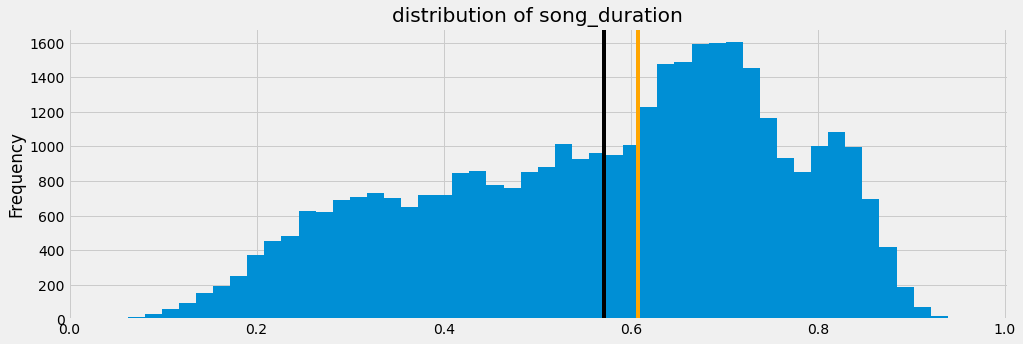

In [16]:
"""Using Sklearn SimpleImputer"""
from sklearn.impute import SimpleImputer
imptr = SimpleImputer(strategy="mean", add_indicator=False)

print("Mean of Song Duration variable: ", train['song_duration_ms'].mean())

ax = train['danceability'] \
    .plot(kind='hist', bins=50, figsize=(15, 5),
          title='distribution of song_duration')
ax.axvline(train['danceability'].mean(),
           color='black')
ax.axvline(train['danceability'].median(),
           color='orange')

In [17]:
%%time
"""From Iterative Imputer"""
# Multivariate imputer that estimates each feature from all the others.
# A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.
# Uses by default the BayesianRidge model to impute
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer


it_imputer = IterativeImputer(max_iter=10)
train_iterimp = it_imputer.fit_transform(train[FEATURES])
test_iterimp = it_imputer.transform(test[FEATURES])
tt_iterimp = it_imputer.fit_transform(tt[FEATURES])

# Create train test imputed dataframe
tt_iter_imp_df = pd.DataFrame(tt_iterimp, columns=FEATURES)

CPU times: user 6.95 s, sys: 5.75 s, total: 12.7 s
Wall time: 3.24 s


[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="4"></a>
<a id="4.1"></a>
<a id="4.2"></a>

<div style="background:#2b6684   ;font-family:'Times';font-size:35px;color:  #F0CB8E" >&ensp;Visualisation - Individual features</div>
<div class="alert alert-warning" role="alert">
<li style="font-family:cursive;font-size:18px; color:#A20404">After getting an initial idea about our features and their values, we can now dive into the visual part of the exploration. I recommend to always plot your data. Sometimes this might be challenging, e.g. because you have tons of features. In that case, you want to start at least with a subset before you run any dimensionality reduction or other tools. This step is as much about spotting issues and irregularities as it is about learning more about the shapes and distributions of your features.
    
<ul style="font-family:cursive;font-size:18px; color:#A20404" ><a href = "#400">Predictor features</a>
    
<li>In the live session, we were building this plot step by step. (Well, we got most of the way there.) It really pays off to take the time and investigate each feature separately. This is one of the most instructive steps in the EDA process, where you aim to learn how messed up your features are. No dataset is perfect. We want to figure out how severe those imperfections are, and whether we can live with them or have to address them.</li>

<li>Different kind of data types go best with different kind of visuals. My recommendation is to start out with density plots or histograms for numerical features, and with barcharts for those that are better expressed as types of categories.</li>
</ul>
    
    
<ul style="font-family:cursive;font-size:18px; color:#A20404" ><a href = "#401">Target: Song Popularity</a>
    
<li>On to the target itself. We figured out that song_popularity is a binary feature, and thus we can express it as boolean. Here we plot a barchart, and create a scale of percentages, rather than absolute values.</li>
</ul></div>

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="400"></a>

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:25px; color:#0E198A; font-weight: bold">Predictor features
</ul>
</div>

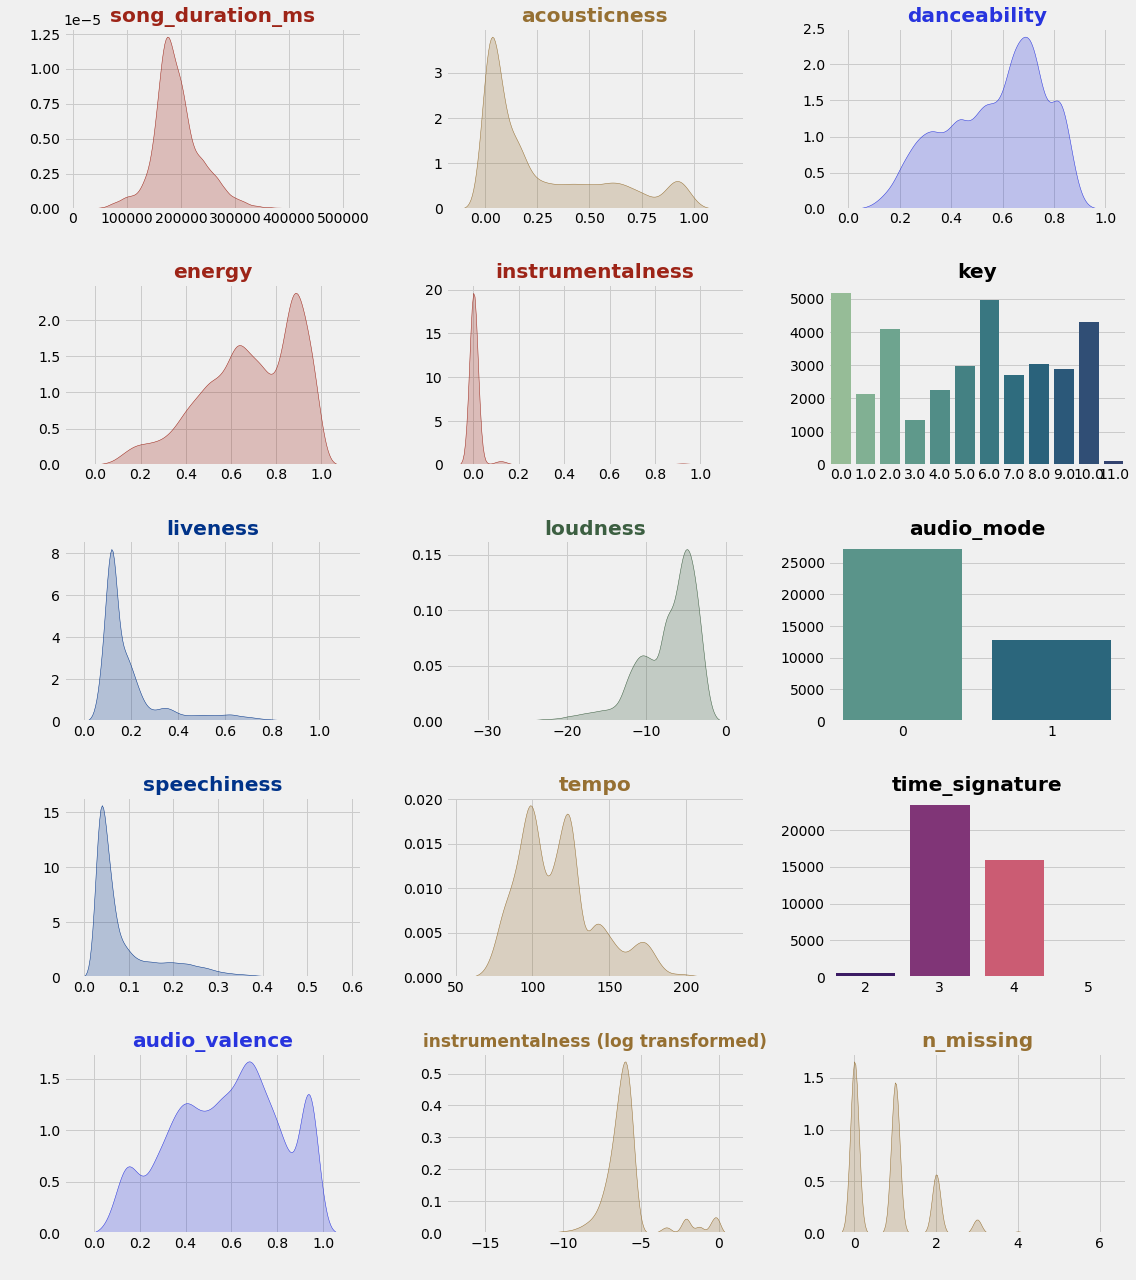

In [18]:
useful_cols = [col for col in train.columns if col not in ['id', 'song_popularity']]
cols_dist = [col for col in useful_cols if col not in ['key', 'audio_mode', 'time_signature']]
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
cmap_ = ['magma', 'copper', 'crest']


plt.figure(figsize= (16,18))
for i,col in enumerate(train[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5,3, i+1)
    if col in cols_dist:
        
        sns.kdeplot(train[col], color = rand_col, fill = rand_col )
        plt.title(col,weight = 'bold', color = rand_col)
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data = train , x = col, palette = cmap_[random.sample(range(3), 1)[0]] )
        plt.title(col,weight = 'bold', color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
        
plt.subplot(5,3, 14)
sns.kdeplot(np.log(train['instrumentalness']), color = rand_col, fill = rand_col )
plt.title('instrumentalness (log transformed)',weight = 'bold', color = rand_col, size = 17)
plt.ylabel(" ")
plt.xlabel(" ")
plt.tight_layout()
plt.show();

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-family:cursive;font-size:25px">We find:</b>
    
<li>Our initial impressions of the data types have largely been confirmed: audio_mode is a boolean feature, and time_signature and key are ordinal or categorical ones (or integer; although a better understanding of those musical concepts would certainly benefit from some domain knowledge.)</li>
<li>A number of features are bounded between 0 and 1: accosticness, danceability, energy, liveliness, speechiness, and audio_valence.</li>
<li>The feature loudness looks like it refer to the decibel scale.</li>
<li>The distribution of instrumentalness is heavily right-skewed, and even after a log transform this feature doesn’t look very well-behaved. This might need a bit more work.</li>
</ul>
</div>

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="401"></a>

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px; color:#0E198A">Target: Song Popularity</b>
    <li>On to the target itself. We figured out that song_popularity is a binary feature, and thus we can express it as boolean. Here we plot a barchart, and create a scale of percentages, rather than absolute values.</li>
</ul>
</div>

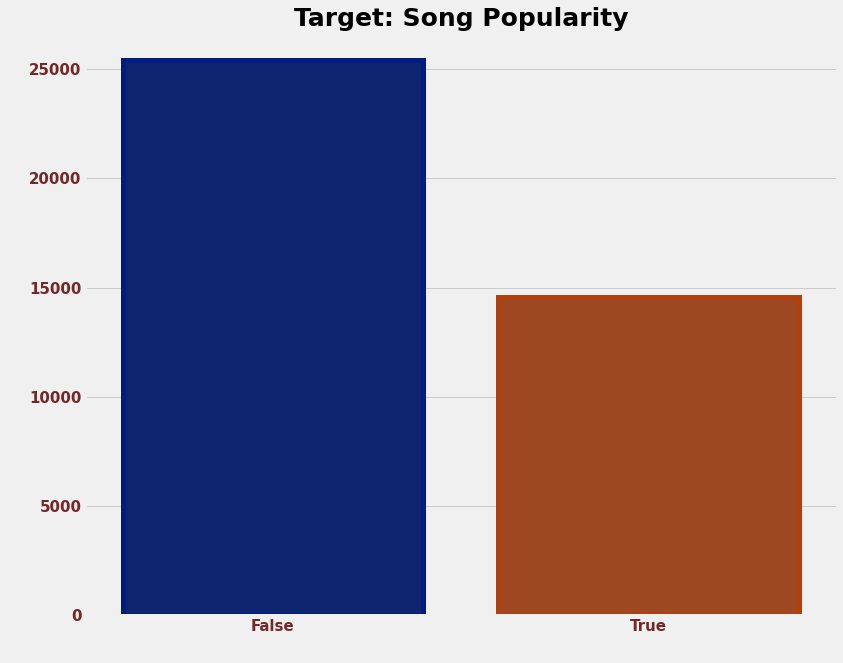

In [19]:
train.song_popularity =train.song_popularity.astype('bool')
plt.figure(figsize = (12,10))
ax = sns.countplot(data = train , x = 'song_popularity', palette = 'dark',linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.title("Target: Song Popularity",weight = 'bold', color = 'black', size = 25)
plt.ylabel(" ")
plt.xlabel(" ")
plt.xticks(size = 15, weight ='bold', color = '#742828')
plt.yticks(size = 15, weight ='bold', color = '#742828')
plt.show()

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px;">We find:</b>
    
<li>There is a slight imbalance in the target distribution: a bit more than 60/40. Not super imbalanced, but something to keep in mind.</li>
</ul>
</div>

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="5"></a>
<a id="5.1"></a>
<a id="5.2"></a>

<div style="background:#2b6684   ;font-family:'Times';font-size:35px;color:  #F0CB8E" >&ensp;Feature interactions (still in progress)</div>
<div class="alert alert-warning" role="alert">
<li style="font-family:cursive;font-size:18px; color:#A20404">After learning more about each individual feature, we now want to see them interacting with one another. It’s best to perfom those steps in that order, so that you can understand and interpret the interactions in the context of the overall distributions.</li>
    
<ul style="font-family:cursive;font-size:18px; color:#A20404" ><a href = "#500">Target impact</a>
    
<li>We have seen all the feature distributions, now we want to investigate whether they look different based on the target value. Here’s an example for song_duration:</li>
</ul>
    
    
<ul style="font-family:cursive;font-size:18px; color:#A20404" ><a href = "#501">Feature-Feature interaction  (correlation)</a>
    
<li>How do the predictor features interact with each other? Are there any redundancies or strong relationships? We will start out with a correlation matrix, and then look at features of interest in a bit more detail.</li>
</ul>
<ul style="font-family:cursive;font-size:18px; color:#A20404" ><a href = "#502">Feature-target interactions</a>
    
<li>Once we have found interesting correlations we can look for clustering in the target variable.</li></ul></div>

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="500"></a>

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px; color:#0E198A">Target impact</b>
<li>We have seen all the feature distributions, now we want to investigate whether they look different based on the target value. So, let's plot all of them together and understand the pattern.</li>
</ul>
</div>

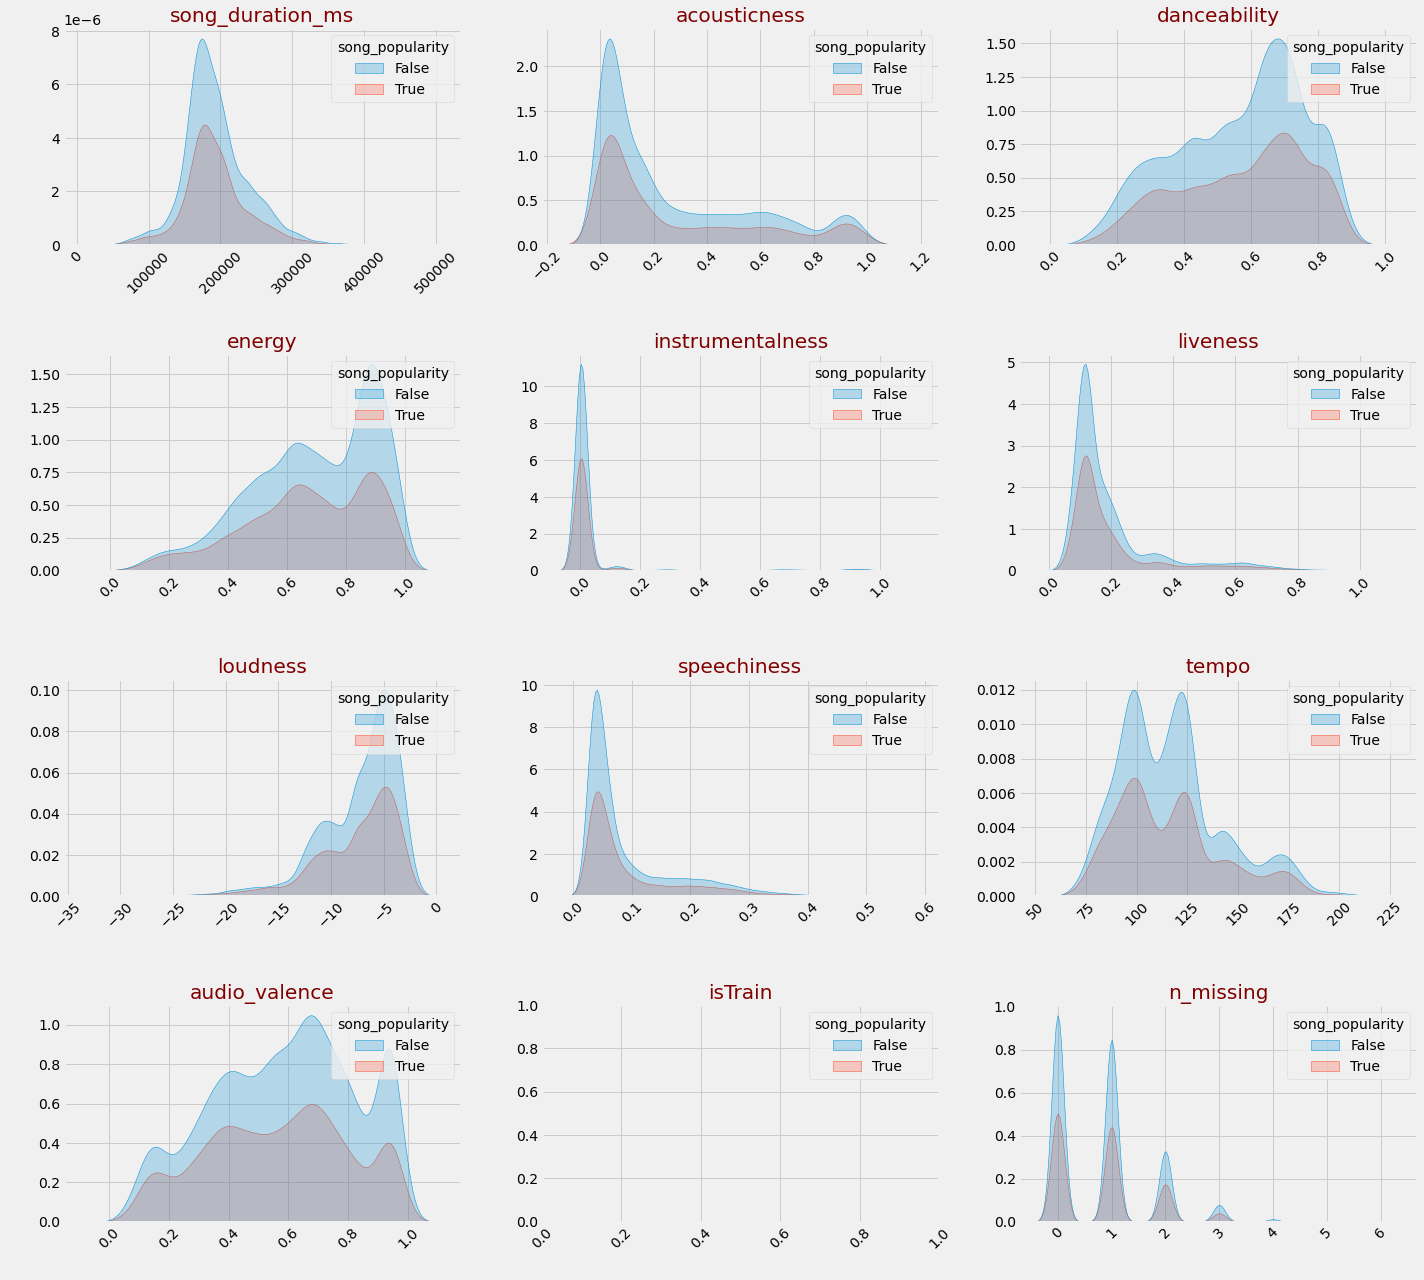

In [20]:
plt.figure(figsize = (20,18))
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
for i in enumerate(train[cols_dist].columns):
  rand_col = color_[random.sample(range(6), 1)[0]]

  plt.subplot(4,3,i[0]+1)
  sns.kdeplot(data = train, x = i[1], hue = 'song_popularity', fill = rand_col, color = rand_col )
  plt.title (i[1], color = 'maroon')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(rotation = 45)
  plt.tight_layout()

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px">Observations:</b>
    
<li>By looking at the probability distribution of different variables we find that popular songs are almost exactly the same length as unpopular ones. There is a slight difference, but it’s pretty small.</li>
</ul>
</div>

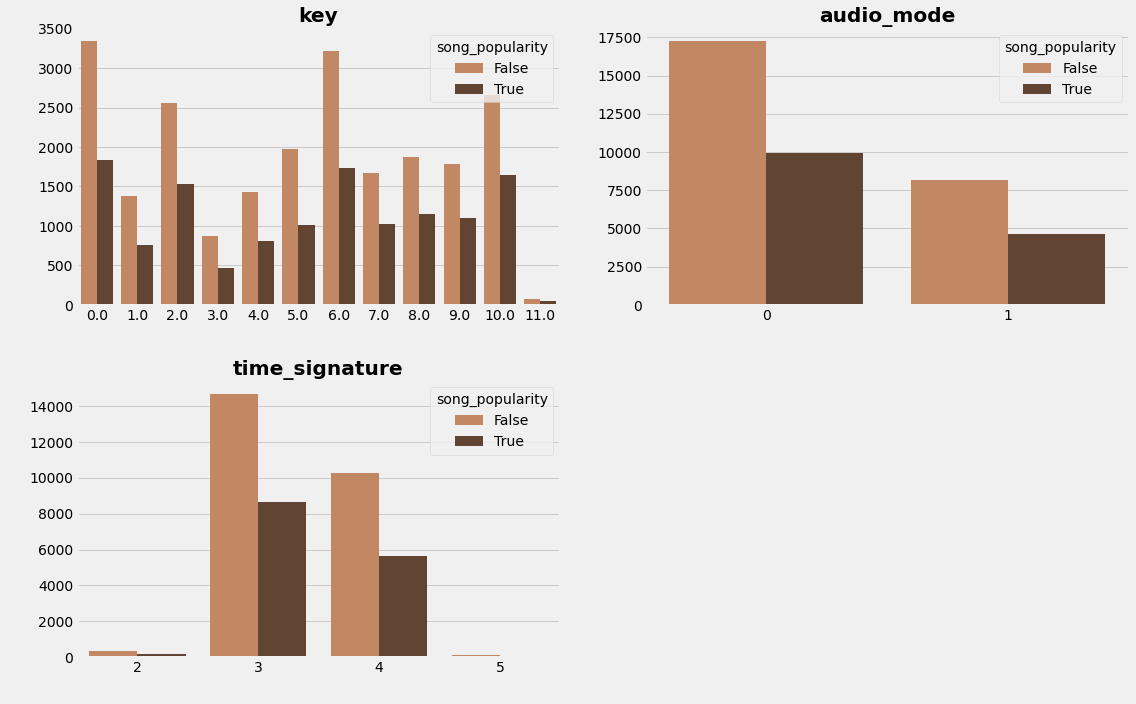

In [21]:
plt.figure(figsize = (16,10))
for i,col in enumerate(['key', 'audio_mode', 'time_signature']):
    plt.subplot(2,2,i+1)
    sns.countplot(data = train , x = col, palette = 'copper_r', hue = 'song_popularity' )
    plt.title(col,weight = 'bold', color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px">Observations:</b>
<li>This kind of view does tell us as much, though, because the imbalance between popular and unpopular songs appears to be pretty universal for all realisations of all features. In order to see the relative percentages of song_popularity = 1 or 0 (or true vs false as we’re expressing it here) we need to compute those fractions for every feature & value combination. Luckily, this can be done quickly through pivoting.</li></ul>
</div>




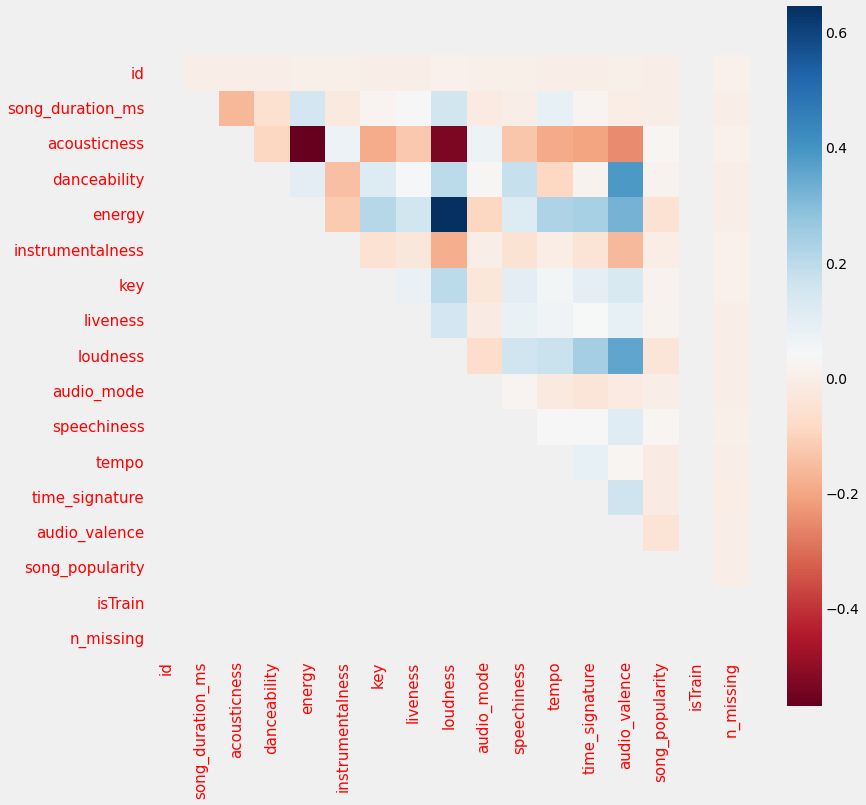

In [22]:
plt.figure(figsize = (12,12))
corr_matrix=train.corr()
 
matrix = np.tril(corr_matrix) # take lower correlation matrix

# Draw the heatmap with the mask
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu')
plt.xticks(size = 15,color = 'red')
plt.yticks(size = 15,  color = 'red');

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px">We find:</b>    
<li>There’s a strong anti-correlation between acousticness vs energy and loudness, respectively. Consequently, energy and loudness share a strong correlation.</li>
<li>None of the features individually show a notable correlation with the target song_popularity.</li>
<li>Let’s plot energy vs acousticness to get a feel for this correlation.</li>
</ul>
</div>

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="501"></a>

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px; color:#0E198A">Feature-Feature interaction (correlation)</b>
<li>How do the predictor features interact with each other? Are there any redundancies or strong relationships? We will start out with a correlation matrix, and then look at features of interest in a bit more detail.</li>
</ul>
</div>

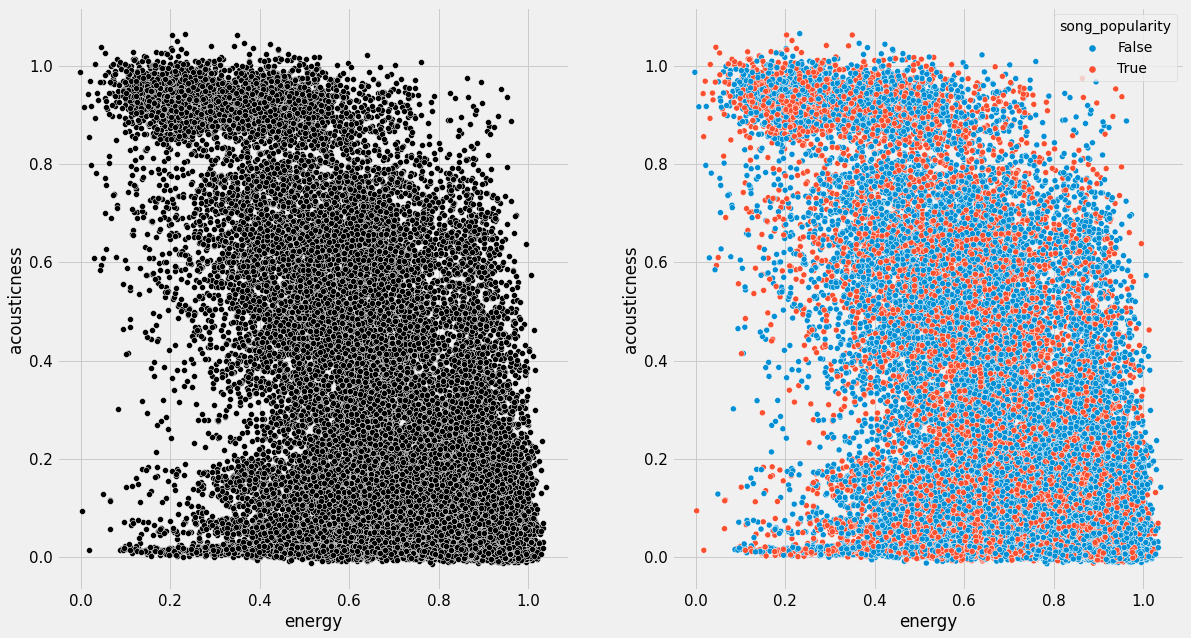

In [23]:
plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
sns.scatterplot(data = train, x = 'energy', y = 'acousticness', color = 'black')
plt.xticks(size = 15,)
plt.yticks(size = 15,)

plt.subplot(1,2,2)
sns.scatterplot(data = train, x = 'energy', y = 'acousticness', hue = 'song_popularity')
plt.xticks(size = 15,)
plt.yticks(size = 15,);

[<p style="font-family:cursive;font-size:18px; color:#A20404">back to Table of Contents</p>](#table-of-contents)
<a id="502"></a>

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px; color:#0E198A">Feature-target interactions</b>
<li>Instead of plotting only one plot which Martin showed as an instance of what could be done, I've plotted a pairplot to check the cluster pattern between two independent variables with respect to song_popularity.</li>
</ul>
</div>

<Figure size 1440x1440 with 0 Axes>

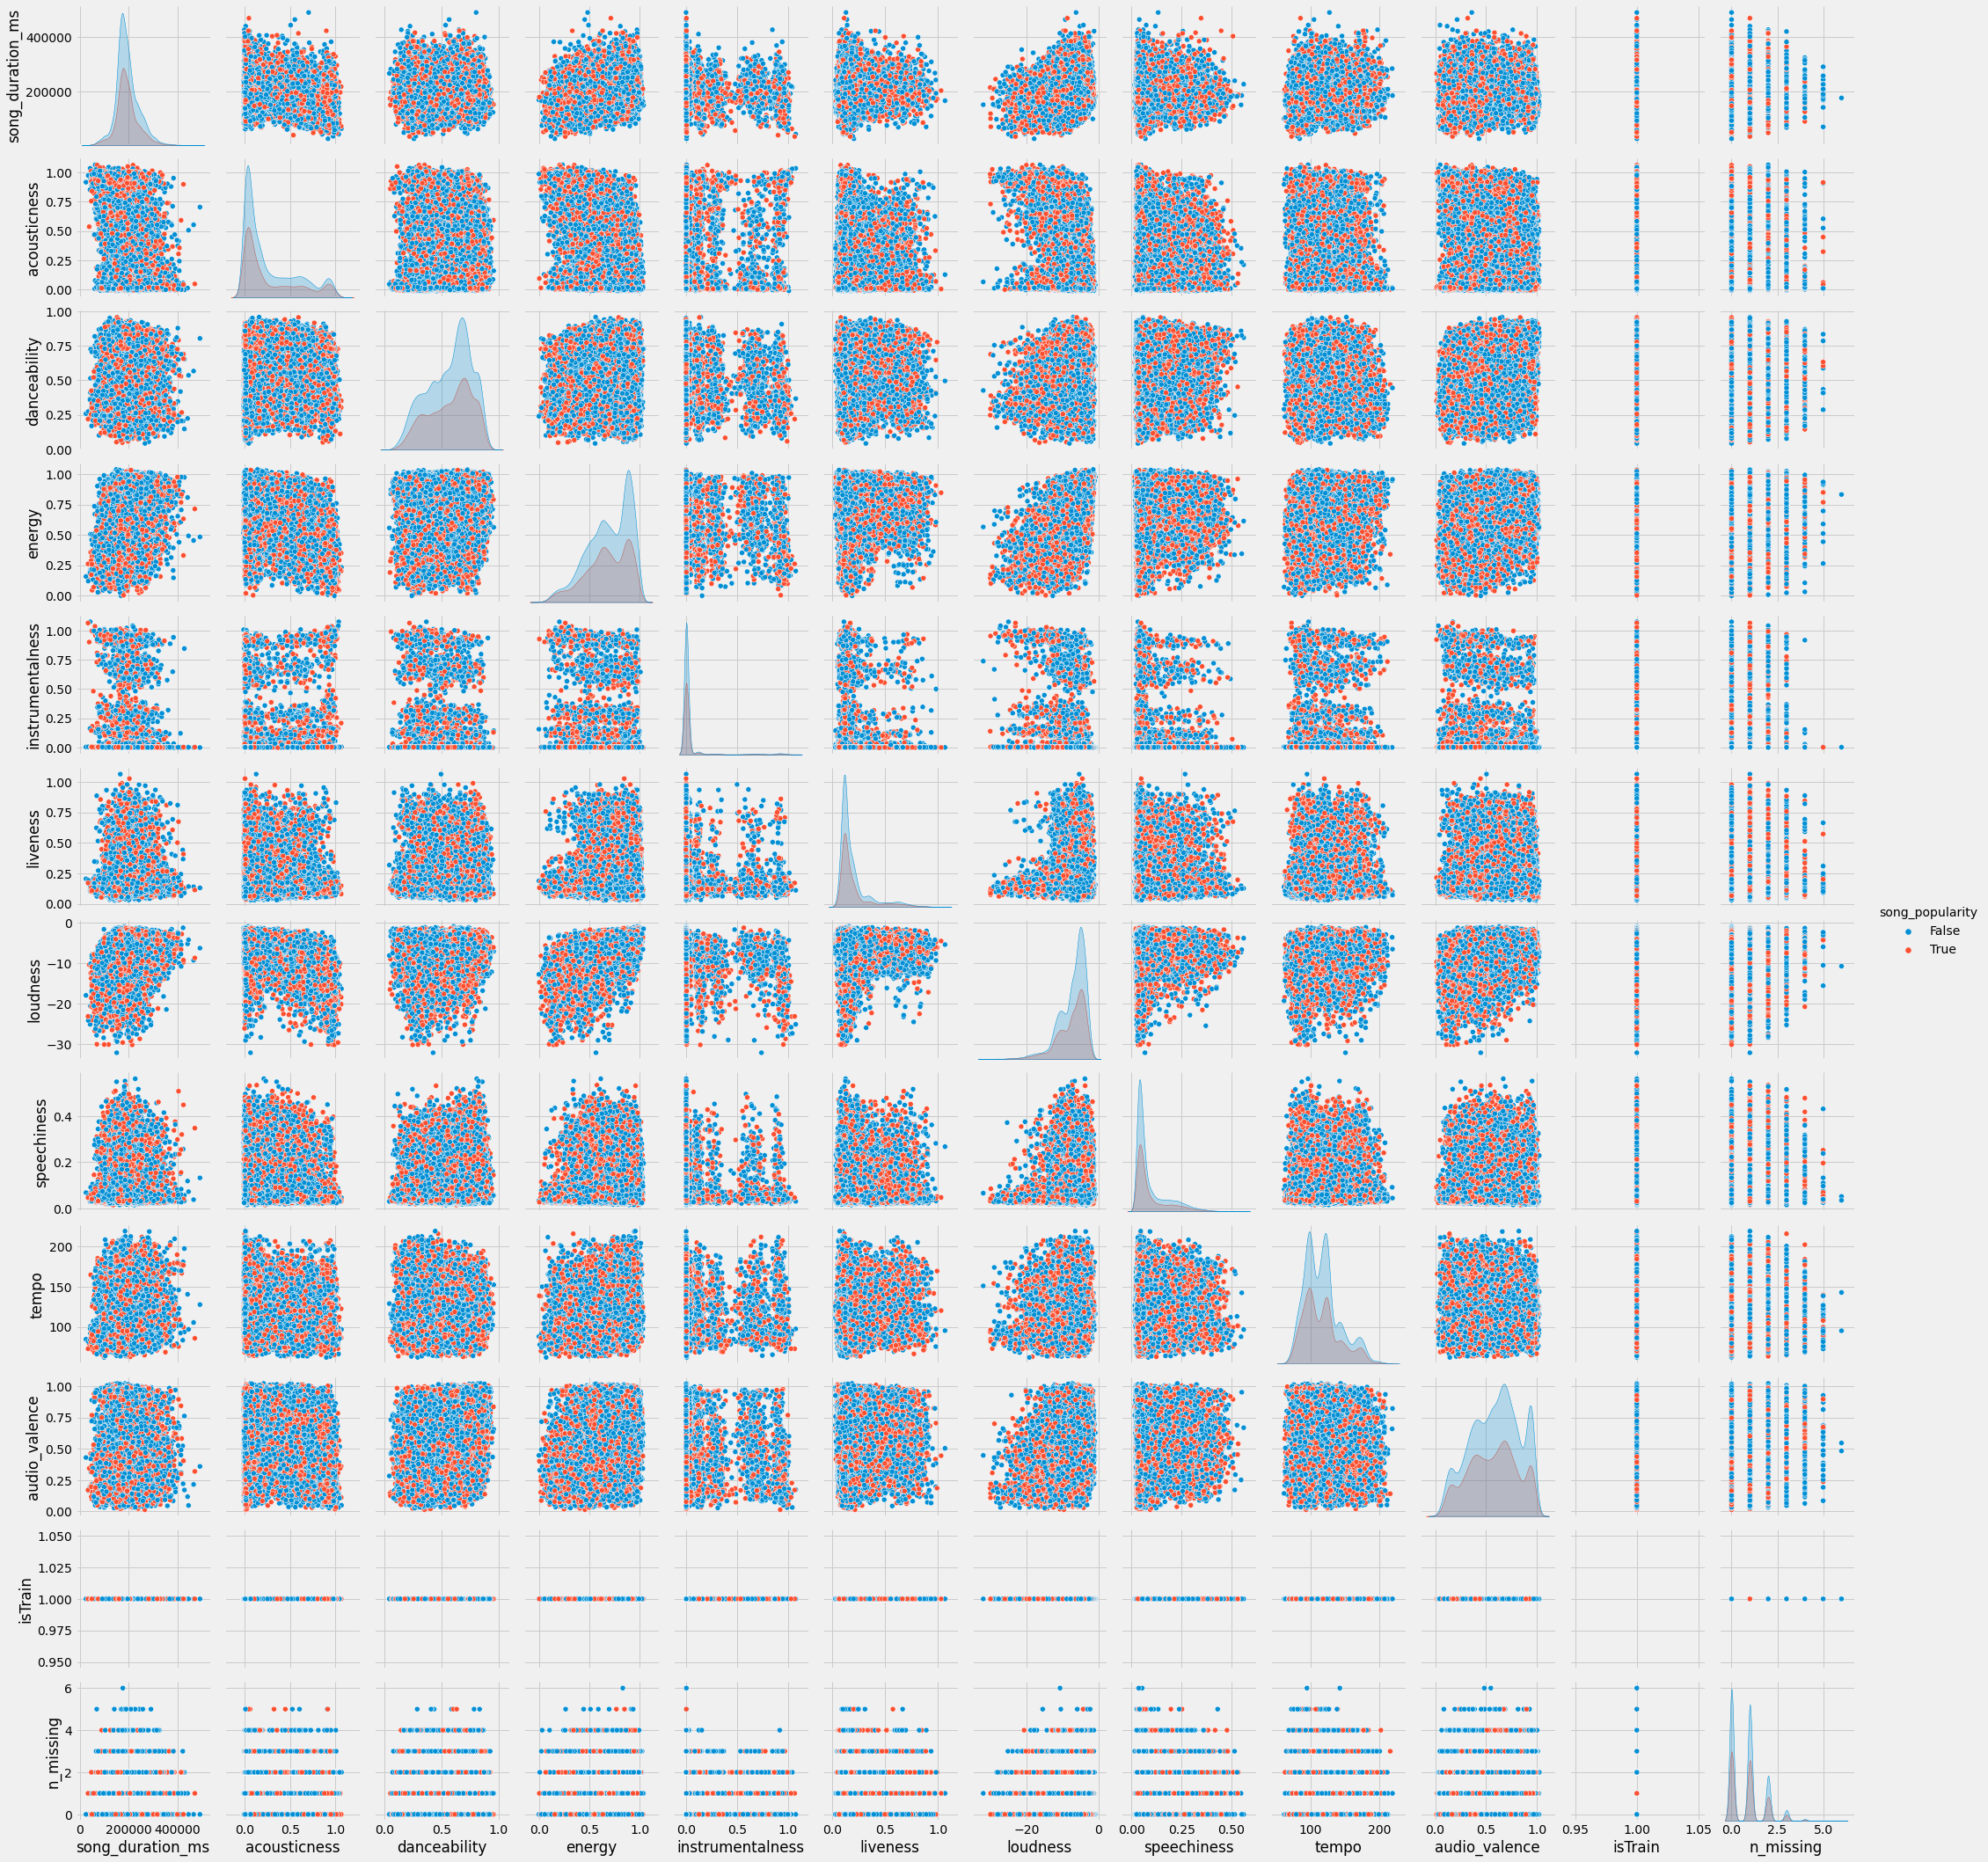

In [24]:
train.song_popularity =train.song_popularity.astype('object')
plt.figure(figsize = (20,20))
sns.pairplot(data = train, hue = 'song_popularity',vars=cols_dist)

<div class="alert alert-warning" role="alert">
<ul style="font-family:cursive;font-size:18px; color:#A20404"><b style="font-size:25px">We find:</b>    
<li>Data is not linearly separable.</li>
<li>There are some clusters visible between instrumentalness and some other variables, it'll be interesting to see what can be infered from them after further investigation.</li>
</ul>
</div>

<div style="background:#F0CB8E   ;font-family:'Times';font-size:35px;color:  maroon" >&ensp;Thank you <a href="https://www.kaggle.com/headsortails" target="_blank"> Martin Henze</a> and <a href="https://www.kaggle.com/abhishek" target="_blank"> Abhishek Thakur</a>. I look forward to learn more.</div>
<div style="background:#F0CB8E   ;font-family:'Times';font-size:35px;color:  maroon" >&ensp;I will smile for every upvote :)</div>


<div style =abcd  </div>

<div class="alert alert-warning" role="alert">
<ul style="#F0CB8E" 